# 使用LDA对糖尿病数据降维

**案例描述**

提前预测是否患有糖尿病对个人生活有至关重要的影响。现有皮马印第安人过去五年内是否患有糖尿病的数据。使用LDA对糖尿病数据集做降维。比较降维前后模型性能的差别


In [1]:
#导入包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# 导入数据
data = pd.read_csv("./data/pima-indians-diabetes.csv")
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#统计缺失数据
def calcNull(data):
    nullSum=data.isnull().sum()
    nullSum=nullSum.drop(nullSum[nullSum.values==0].index)
    return nullSum
missing_data=calcNull(data)
missing_data

Series([], dtype: int64)

<AxesSubplot:>

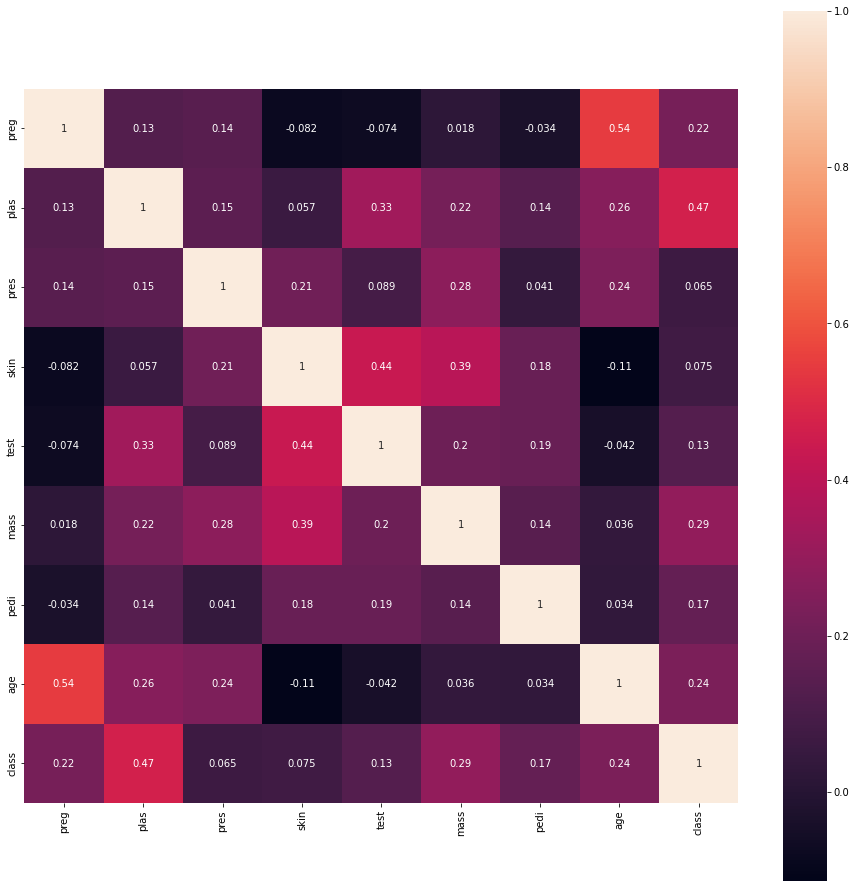

In [4]:
#绘制热力图
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(16,16))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.heatmap(corr, vmax=1.0, square=True,annot=True)
# 各个变量都较为独立

In [5]:
#查看类别变量的各个种类值
def show_labels(data):
    print("-"*10+"show lables"+"-"*10)
    for i, column in enumerate(data.columns):
        if data.dtypes[column]==np.object:
            print("\n---"+column+"---\n")
            print(data[column].value_counts())
    print("*"*10+"show lables"+"*"*10)
show_labels(data)

----------show lables----------
**********show lables**********


In [6]:
#分离自变量和因变量
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
print(X,Y)

     preg  plas  pres  skin  test  mass   pedi  age
0       6   148    72    35     0  33.6  0.627   50
1       1    85    66    29     0  26.6  0.351   31
2       8   183    64     0     0  23.3  0.672   32
3       1    89    66    23    94  28.1  0.167   21
4       0   137    40    35   168  43.1  2.288   33
..    ...   ...   ...   ...   ...   ...    ...  ...
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
766     1   126    60     0     0  30.1  0.349   47
767     1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64


In [7]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (614, 8)
x_test (154, 8)
y_train (614,)
y_test (154,)


In [8]:
# 特征缩放
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [25]:
# 使用 LDA 降维
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda=lda.transform(x_test)
print(x_train_lda.shape,x_test_lda.shape)

(614, 1) (154, 1)


In [26]:
##逻辑回归模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( class_weight='balanced')

In [27]:
#使用原始数据集进行预测
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0]
0.7207792207792207


In [28]:
#使用降维数据集进行预测
lr.fit(x_train_lda,y_train)
y_pred_lda=lr.predict(x_test_lda)
print(y_pred_lda)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_lda))

[1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 1 0]
0.7467532467532467


In [29]:
# 可视化结果
ones=np.ones((x_test_lda.shape[0],1))
x_test_lda=np.append(x_test_lda,ones,axis=1)
x_test_lda

array([[ 0.41264964,  1.        ],
       [ 1.0138078 ,  1.        ],
       [-0.49680361,  1.        ],
       [-0.06412185,  1.        ],
       [-1.00692499,  1.        ],
       [ 0.08521306,  1.        ],
       [-0.1127684 ,  1.        ],
       [-0.37981738,  1.        ],
       [ 1.14011975,  1.        ],
       [ 0.15260251,  1.        ],
       [ 1.51784012,  1.        ],
       [ 0.86917642,  1.        ],
       [ 0.17704242,  1.        ],
       [-1.14411211,  1.        ],
       [ 0.08683329,  1.        ],
       [-0.91027134,  1.        ],
       [-2.07179235,  1.        ],
       [-0.30767688,  1.        ],
       [ 0.11195357,  1.        ],
       [ 1.62290032,  1.        ],
       [-0.95495252,  1.        ],
       [-0.37077677,  1.        ],
       [-0.54353708,  1.        ],
       [-0.65536531,  1.        ],
       [ 2.14846786,  1.        ],
       [-1.29224561,  1.        ],
       [ 0.5484415 ,  1.        ],
       [-2.25650719,  1.        ],
       [ 1.12961314,

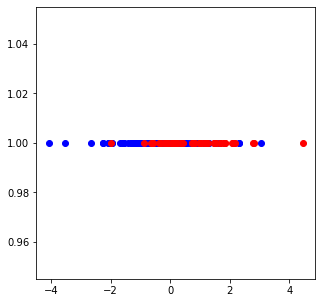

In [33]:
#可视化结果
plt.figure(figsize=(5,5))
plt.scatter(x_test_lda[y_test==0,0],x_test_lda[y_test==0,1],c="blue")
plt.scatter(x_test_lda[y_test==1,0],x_test_lda[y_test==1,1],c="red")
plt.show()